# **Fake News Classifier**

Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
!pip install --upgrade scikit-learn


In [2]:
import pandas as pd

In [3]:
news = pd.read_csv("train.txt", on_bad_lines='skip', engine='python')

news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Get the Independent Features
X = news.drop("label", axis=1)

X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [5]:
#  Get the Dependent features
y = news["label"]

y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [6]:
news.shape

(20822, 5)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [8]:
news = news.dropna()

In [9]:
news.shape

(18285, 5)

In [10]:
news.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
mess = news.copy ()

In [12]:
mess.reset_index(inplace=True)

In [13]:
mess.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
mess["text"][9]

'The BBC produced spoof on the “Real Housewives” TV programmes, which has a comedic Islamic State twist, has been criticised by Leftists and Muslims who claim the sketch is offensive. [The BBC released the trailer earlier this week and were immediately slammed by those on the left and Muslims who thought that making fun of the brides of members of the terror group was out of the bounds of conventional humour. The sketch is part of a new programme called “Revolting” written by Jolyon Rubinstein and Heydon Prowse which, according to the BBC, is “satirising the state of the nation. ”  LOLOLOL pic. twitter.   —   Raheem Kassam (@RaheemKassam) January 4, 2017,  The BBC2 Facebook page was inundated with criticism. One user wrote, “I’m mortified that the BBC had produced such a programme. This is simply bad taste. The fact it is a comedy makes it even more worrying that humour should be associated with the actions of ISIS. Is this really what TV licenses are funding! ?” Others took a differen

In [15]:
# import Libraries
import nltk

# Ensure the punkt resource is downloaded
nltk.download('punkt') # Punkt resource is needed for sentence tokenization, punkt_tab is a specific internal representation
nltk.download('punkt_tab') # Download the resource explicitly

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(mess)):
    review = re.sub('[^a-zA-Z]', ' ', mess['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[5]

'tri time jacki mason voic reason week exclus clip breitbart news jacki discuss loom threat north korea explain presid donald trump could win support hollywood left u need strike first decid bomb whole countri behind everybodi realiz choic thing jacki say except hollywood left get nauseou trump could win left fall love minut bomb better reason jacki explain like transgend toilet jacki also say surpris hollywood celebr support trump strike syrian airfield month infuri say might save live mean anyth save environ climat chang happiest peopl world still jacki say got noth hollywood celeb got tough life countri watch jacki latest clip follow daniel nussbaum twitter dznussbaum'

In [18]:
print(corpus[7])

week michael flynn resign nation secur advis seal propos offic outlin way presid trump lift sanction russia mr flynn gone caught lie discuss sanction russian ambassador propos peac plan ukrain russia remain along push michael cohen presid person lawyer deliv document felix h sater busi associ help mr trump scout deal russia ukrainian lawmak tri rise polit opposit movement shape part mr trump former campaign manag paul manafort time mr trump tie russia peopl connect heighten scrutini investig american intellig agenc f b congress associ remain will eager wade effort behind scene mr trump confound democrat republican alik repeat prais russian presid vladimir v putin desir forg allianc noth illeg unoffici effort propos seem tip toward russian interest may set alarm amateur diplomat say goal simpli help settl gruel conflict cost live want help bring peac mr cohen ask propos contain peac plan andrii v artemenko ukrainian lawmak see leader futur ukrain claim evid name compani wire transfer sh

In [19]:
# Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf_vect.fit_transform(corpus).toarray()

**max_features=5000:**

- This limits the vocabulary to the top 5000 most frequent words/phrases across your corpus.

- It helps reduce dimensionality and remove less informative words.

**ngram_range=(1, 3):**

- This tells the vectorizer to consider:

    - Unigrams (single words),

    - Bigrams (two-word phrases),

    - Trigrams (three-word phrases).

- Example: "machine learning is fun" will generate:

    - Unigrams: ["machine", "learning", "is", "fun"]

    - Bigrams: ["machine learning", "learning is", "is fun"]

    - Trigrams: ["machine learning is", "learning is fun"]

In [20]:
X.shape

(18285, 5000)

In [21]:
y = mess['label']

In [22]:
# Split the dataset into Train and Testtfidf_v.get_feature_names()[:20]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [23]:
tfidf_vect.get_feature_names_out()[:20]

# cv.get_feature_names()[:20]  # See all features name by ngram_range=(1,3) (old code)
tfidf_vect.get_feature_names_out()[:20]  # first 20 features (words or n-grams) selected by your CountVectorizer

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access'], dtype=object)

In [24]:
tfidf_vect.get_params()  # Referring to TF-IDF model

tfidf_vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [25]:
count_df = pd.DataFrame(X_train, columns=tfidf_vect.get_feature_names_out())

count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.000000,0.0,0.0,0.352456,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.028579,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.021028,0.0,0.000000,0.062242,0.000000,0.0,0.0,0.0,0.028616,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.031809,0.131646,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.051598,0.000000,0.051401,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [26]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**MultinomialNB Algorithm**

it works well for text data, and it suppported multiple categories of output

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [28]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.899
Confusion matrix, without normalization


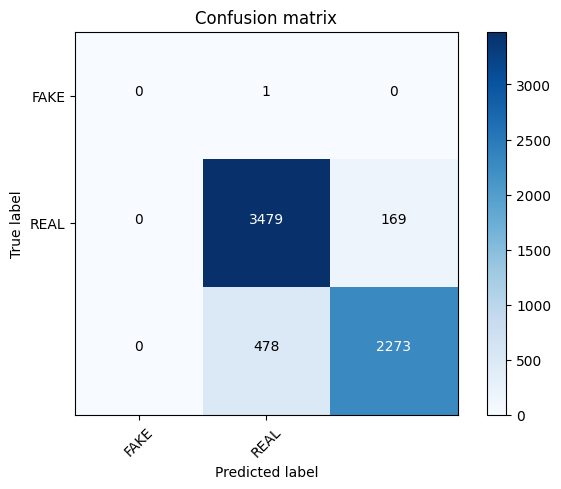

In [29]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
conf_mtrx = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_mtrx, classes=['FAKE', 'REAL'])

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
acc_score

0.89875

In [31]:
y_train.shape

(11885,)

**Passive Aggressive Classifier Algorithm**

it works well with text data

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)  # n_ite (old)

accuracy:   0.953
Confusion matrix, without normalization


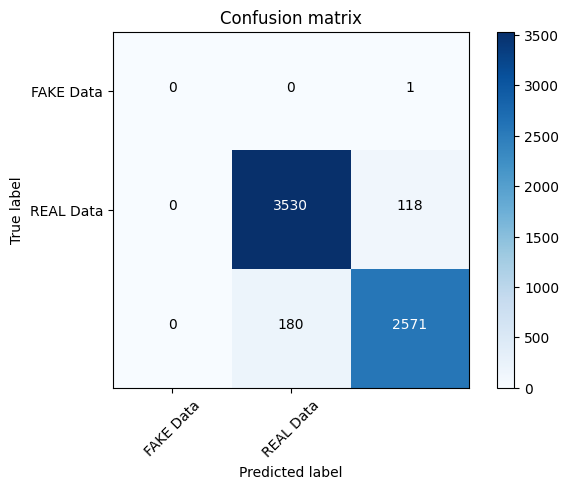

In [33]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**Multinomial Classifier with Hyperparameter**

In [34]:
classifier = MultinomialNB(alpha=0.1)

In [35]:
#  looping over values of alpha from 0 to 0.9. For each alpha, training a new model and checking its accuracy.
#  keep the best performing classifier.
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: invalid value encountered in subtract
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score : 0.0
Alpha: 0.1, Score : 0.90140625
Alpha: 0.2, Score : 0.90078125
Alpha: 0.30000000000000004, Score : 0.9
Alpha: 0.4, Score : 0.89984375
Alpha: 0.5, Score : 0.89984375
Alpha: 0.6000000000000001, Score : 0.899375
Alpha: 0.7000000000000001, Score : 0.899375
Alpha: 0.8, Score : 0.89953125
Alpha: 0.9, Score : 0.899375


In [36]:
# Get feature names from CountVectorizer
feature_names = tfidf_vect.get_feature_names_out()

In [37]:
classifier.coef_[0]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [38]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [39]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

### Why **classifier.coef_** sometimes works with **MultinomialNB**
Normally, **MultinomialNB** from **sklearn.naive_bayes** does not document **coef_** as a public attribute.

However, **coef_** is a hidden alias for **feature_log_prob_** that:

- only exists if your data has 2 classes

- is created for consistency with other scikit-learn classifiers (like LogisticRegression)

- is sometimes removed in future versions, so it might break even if it works now

So when your guide code uses **classifier.coef_**, it works **only because**:

- You're doing binary classification

- You're using a version of scikit-learn that still exposes **coef_** as an alias

### **Official and Safer Alternative**
**Use this (official and stable):**

classifier.feature_log_prob_[0]

**Or to get the feature importance difference between classes:**

classifier.feature_log_prob_[1] - classifier.feature_log_prob_[0]


In [40]:
# Use feature_log_prob_ instead of coef_
classifier.feature_log_prob_[0]

array([-8.51719319, -8.51719319, -8.51719319, ..., -8.51719319,
       -8.51719319, -8.51719319])

In [41]:
# feature importance difference between classes
classifier.feature_log_prob_[1] - classifier.feature_log_prob_[0]

array([-0.66552651, -0.33059194,  0.05046758, ..., -1.65113945,
       -0.25746082, -2.78879426])

In [42]:
# Use feature_log_prob_ to get real_class_features
real_class_features = classifier.feature_log_prob_[1]

In [43]:
# Use feature_log_prob_ to get fake_class_features
fake_class_features = classifier.feature_log_prob_[0]

In [44]:
# Get most indicative features for REAL news
most_real = sorted(zip(real_class_features, feature_names), reverse=True)[:20]
print("Most Real News Features:\n")
for score, word in most_real:
    print(f"{word}: {score:.4f}")

Most Real News Features:

mr: -4.8700
said: -5.1418
trump: -5.4246
mr trump: -5.9170
presid: -6.0349
state: -6.0620
would: -6.1844
ms: -6.1876
year: -6.1959
one: -6.2035
peopl: -6.2072
new: -6.2125
time: -6.2993
like: -6.3292
report: -6.4159
also: -6.4897
american: -6.5381
say: -6.5402
news: -6.5427
hous: -6.5631


In [45]:
# Get most indicative features for FAKE news
most_fake = sorted(zip(fake_class_features, feature_names), reverse=True)[:20]
print("\nMost Fake News Features:\n")
for score, word in most_fake:
    print(f"{word}: {score:.4f}")


Most Fake News Features:

zu: -8.5172
zone: -8.5172
zionist: -8.5172
zika: -8.5172
zero: -8.5172
youtub: -8.5172
youth: -8.5172
younger: -8.5172
young peopl: -8.5172
young: -8.5172
yorker: -8.5172
york time: -8.5172
york citi: -8.5172
york: -8.5172
yield: -8.5172
yiannopoulo: -8.5172
yet anoth: -8.5172
yet: -8.5172
yesterday: -8.5172
yemen: -8.5172


**How to Get the Most Informative Features**

In [46]:
# Get log probabilities for each class
log_probs = classifier.feature_log_prob_

In [47]:
# Top features for 'real' class (assuming real is class 1)
top_real = np.argsort(log_probs[1])[::-1][:20]
print("Top 20 features for REAL news:")
print([feature_names[i] for i in top_real])

Top 20 features for REAL news:
['mr', 'said', 'trump', 'mr trump', 'presid', 'state', 'would', 'ms', 'year', 'one', 'peopl', 'new', 'time', 'like', 'report', 'also', 'american', 'say', 'news', 'hous']


In [48]:
# Top features for 'fake' class (assuming fake is class 0)
top_fake = np.argsort(log_probs[0])[::-1][:20]
print("\nTop 20 features for FAKE news:")
print([feature_names[i] for i in top_fake])


Top 20 features for FAKE news:
['aaron', 'zu', 'zone', 'zionist', 'zika', 'zero', 'youtub', 'youth', 'action', 'act', 'across countri', 'across', 'acr', 'acquir', 'acknowledg', 'acid', 'adapt', 'adam', 'ad', 'actual']


**View Feature Weights Sorted Together**

In [49]:
# Difference in log probabilities: higher = more real, lower = more fake
feature_diff = log_probs[1] - log_probs[0]
sorted_features = sorted(zip(feature_diff, feature_names))


In [50]:
# Most real
print("\nMost indicative of REAL news:")
print([f for _, f in sorted_features[-20:]])


Most indicative of REAL news:
['hous', 'news', 'say', 'american', 'also', 'report', 'like', 'time', 'new', 'peopl', 'one', 'year', 'ms', 'would', 'state', 'presid', 'mr trump', 'trump', 'said', 'mr']


In [51]:
# Get most indicative features for REAL news
most_real = sorted(zip(feature_diff, feature_names), reverse=True)[:20]
print("Most indicative of REAL news:\n")
for score, word in most_real:
    print(f"{word}: {score:.4f}")

Most indicative of REAL news:

mr: 3.6472
said: 3.3754
trump: 3.0926
mr trump: 2.6002
presid: 2.4823
state: 2.4552
would: 2.3328
ms: 2.3296
year: 2.3213
one: 2.3137
peopl: 2.3100
new: 2.3046
time: 2.2179
like: 2.1880
report: 2.1013
also: 2.0275
american: 1.9791
say: 1.9770
news: 1.9745
hous: 1.9541


In [52]:
# Most fake
print("Most indicative of FAKE news:")
print([f for _, f in sorted_features[:20]])

Most indicative of FAKE news:
['auf', 'fli zone', 'html', 'http co', 'http www', 'infowar life', 'ist', 'oligarchi', 'pic twitter com', 'ufo', 'utm', 'brain forc', 'twitter com', 'infowar com', 'zu', 'neo', 'como', 'kadzik', 'en el', 'widget']


In [53]:
# Get most indicative features for REAL news
most_real = sorted(zip(feature_diff, feature_names))[:20]
print("Most indicative of FAKE news:\n")
for score, word in most_real:
    print(f"{word}: {score:.4f}")

Most indicative of FAKE news:

auf: -2.8340
fli zone: -2.8340
html: -2.8340
http co: -2.8340
http www: -2.8340
infowar life: -2.8340
ist: -2.8340
oligarchi: -2.8340
pic twitter com: -2.8340
ufo: -2.8340
utm: -2.8340
brain forc: -2.8131
twitter com: -2.8115
infowar com: -2.7982
zu: -2.7888
neo: -2.7799
como: -2.7566
kadzik: -2.7564
en el: -2.7541
widget: -2.7442


### **Creation of WordCloud**

In [54]:
!pip install wordcloud

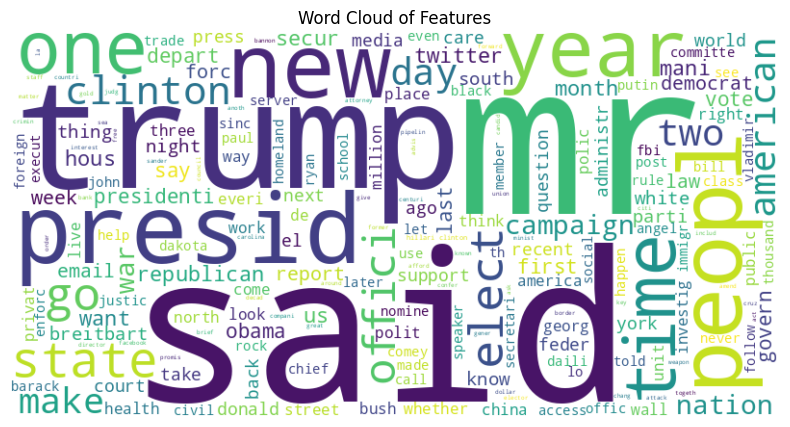

<Figure size 640x480 with 0 Axes>

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(feature_names)  # or use only top fake/real features
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Features")
plt.show()
plt.savefig("Word Cloud of Features using TF-IDF")


# **HashingVectorizer**

- **HashingVectorizer** transforms text into feature vectors using a hashing trick. **It does not check for collisions** and **produces both positive and negative values.**

- MultinomialNB assumes that input features represent counts (non-negative), so **it cannot accept negative values.**

In [57]:
from sklearn.feature_extraction.text import HashingVectorizer
hs_vectorizer = HashingVectorizer(n_features=5000, ngram_range=(1,3), non_negative=True)
X = hs_vectorizer.fit_transform(corpus).toarray()

TypeError: HashingVectorizer.__init__() got an unexpected keyword argument 'non_negative'

In [58]:
hs_vectorizer = HashingVectorizer(n_features=5000, ngram_range=(1,3))
X = hs_vectorizer.fit_transform(corpus).toarray()

In [59]:
X.shape

(18285, 5000)

In [60]:
X

array([[ 0.        , -0.12342962,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02627035, -0.02627035,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.01724651,  0.        , ...,  0.        ,
         0.01724651,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.03573708,  0.        ],
       [ 0.        , -0.05336761,  0.0177892 , ...,  0.0177892 ,
        -0.0177892 ,  0.        ]])

In [61]:
# Split the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [62]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

ValueError: Negative values in data passed to MultinomialNB (input X).